In [23]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [24]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_train = x_train[0:40000]

In [25]:
from keras.callbacks import TensorBoard

history = autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 109s 3ms/step - loss: 0.2351 - val_loss: 0.1798
Epoch 2/20
40000/40000 [==============================] - 87s 2ms/step - loss: 0.1684 - val_loss: 0.1542
Epoch 3/20
40000/40000 [==============================] - 82s 2ms/step - loss: 0.1514 - val_loss: 0.1425
Epoch 4/20
40000/40000 [==============================] - 83s 2ms/step - loss: 0.1416 - val_loss: 0.1353
Epoch 5/20
40000/40000 [==============================] - 76s 2ms/step - loss: 0.1353 - val_loss: 0.1286
Epoch 6/20
40000/40000 [==============================] - 84s 2ms/step - loss: 0.1306 - val_loss: 0.1302
Epoch 7/20
40000/40000 [==============================] - 66s 2ms/step - loss: 0.1274 - val_loss: 0.1271
Epoch 8/20
40000/40000 [==============================] - 50s 1ms/step - loss: 0.1253 - val_loss: 0.1264
Epoch 9/20
40000/40000 [==============================] - 49s 1ms/step - loss: 0.1228 - val_loss: 0.1228
Epoc

[0, 20, 0.09, 0.3]

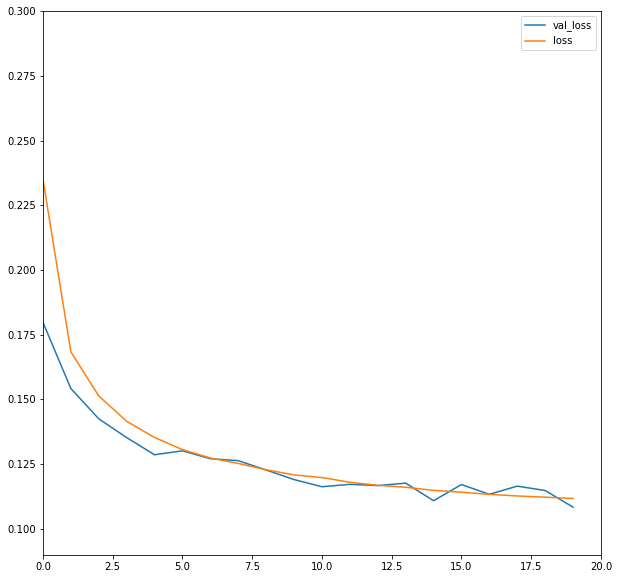

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 8))
plt.axis([0, 20, 0.09, 0.3])